In [ ]:
K Dheeraj Reddy;BL.EN.U4CSE21076;CSE - B;SEM - V.  (ML)  {LAB 9 - 10}

        text  cluster
0      19285        2
1       5915        1
2       3193        2
3      40844        1
4      13732        1
...      ...      ...
10495  29121        1
10496  35111        0
10497  23236        0
10498  30138        1
10499  23835        1

[10500 rows x 2 columns]


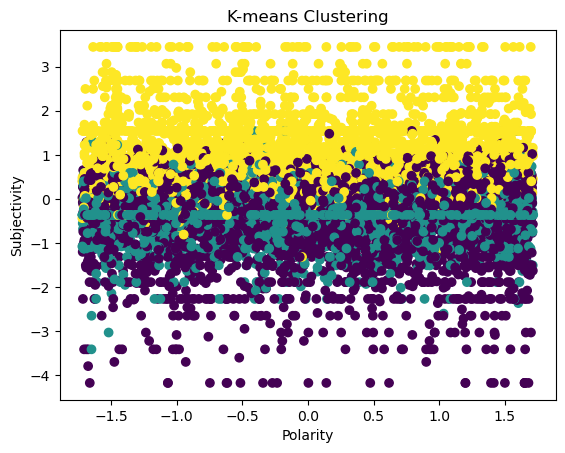

In [1]:
#A1
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

file_path = 'the_final_no_changes_data.csv'
df = pd.read_csv(file_path)

features = df.drop('category', axis=1)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(features_scaled)

print(df[['text', 'cluster']])

plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=df['cluster'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

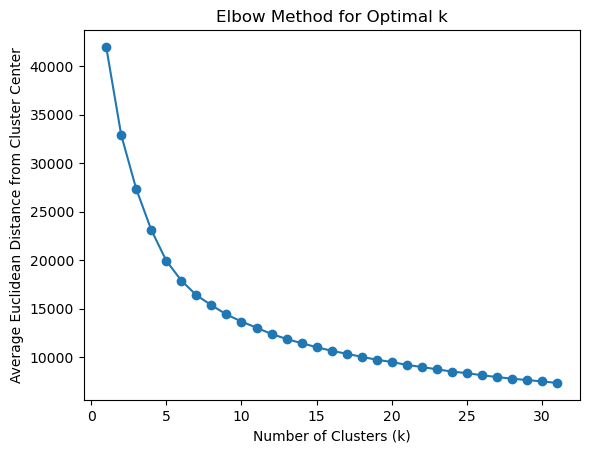

The optimal value of k based on the elbow method is: 20


In [2]:
#A2
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

file_path = 'the_final_no_changes_data.csv'
df = pd.read_csv(file_path)

features = df.drop('category', axis=1)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

inertia = []
k_values = range(1, 32)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Euclidean Distance from Cluster Center')
plt.show()

optimal_k = 0
min_slope = float('inf')

for i in range(1, len(inertia) - 1):
    slope = (inertia[i - 1] - inertia[i]) + (inertia[i + 1] - inertia[i])
    if slope < min_slope:
        min_slope = slope
        optimal_k = i + 1

print(f'The optimal value of k based on the elbow method is: {optimal_k}')

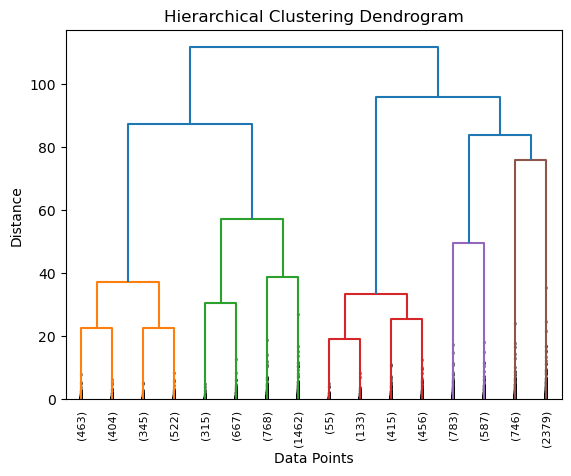

In [3]:
#A3
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

file_path = 'the_final_no_changes_data.csv'
df = pd.read_csv(file_path)

features = df.drop('category', axis=1)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

agg_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')
agg_cluster.fit(features_scaled)

linkage_matrix = linkage(features_scaled, method='ward', metric='euclidean')
dendrogram(linkage_matrix, truncate_mode='level', p=3, leaf_rotation=90, leaf_font_size=8, show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [4]:
#A4
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score

file_path = 'the_final_no_changes_data.csv'
df = pd.read_csv(file_path)

X = df.drop(['category'], axis=1)
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)

sbs = SequentialFeatureSelector(model, n_features_to_select=3, direction='backward', cv=5)

sbs.fit(X_train, y_train)

X_train_selected = sbs.transform(X_train)
X_test_selected = sbs.transform(X_test)

model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with selected features: {accuracy}")


Accuracy with selected features: 0.06095238095238095


The number of features needed to capture 95% of data variance: 4


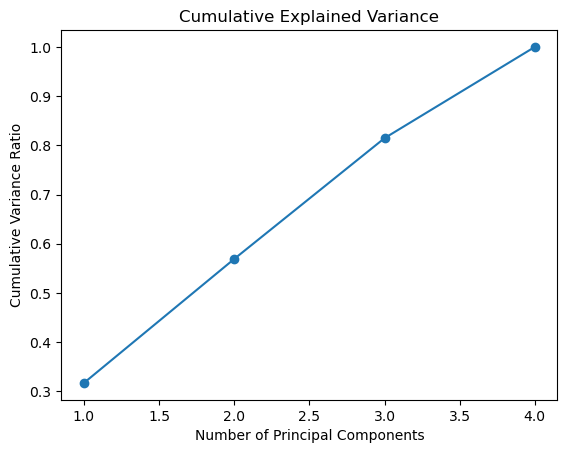

In [5]:
#A5
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

file_path = 'the_final_no_changes_data.csv'
df = pd.read_csv(file_path)

X = df.drop('category', axis=1)
y = df['category']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_var_ratio = pca.explained_variance_ratio_

cumulative_var_ratio = explained_var_ratio.cumsum()

k = next(i for i, ratio in enumerate(cumulative_var_ratio, 1) if ratio >= 0.95)

print(f'The number of features needed to capture 95% of data variance: {k}')

plt.plot(range(1, len(explained_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.show()

In [6]:
#A6
import pandas as pd
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

file_path = 'the_final_no_changes_data.csv'
data = pd.read_csv(file_path)

X = data[['text', 'polarity', 'subjectivity', 'len']]
y = data['category']

kpca = KernelPCA(n_components=3, kernel='linear')
transformed_data = kpca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(transformed_data, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.051904761904761905
